**Part 1 (DATA SET)**

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data=pd.read_excel('my_iris.xlsx')
print(data.columns)
data=data.drop('Unnamed: 0',axis=1)
data.head()

Index(['Unnamed: 0', 'sepal depth', 'sepal diameter', 'petal depth',
       'petal diameter', 'sepal length', 'sepal width', 'petal length',
       'petal width', 'target'],
      dtype='object')


,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width,target
0,NaN,NaN,NaN,NaN,10.2,-7.0,5.6,-0.8,Iris-setosa
1,4.9,3.0,1.4,0.2,9.8,-6.0,5.6,-0.8,Iris-setosa
2,4.7,3.2,NaN,NaN,9.4,-6.4,5.2,-0.8,Iris-setosa
3,4.6,NaN,1.5,NaN,9.2,-6.2,6.0,-0.8,Iris-setosa
4,NaN,3.6,NaN,NaN,10.0,-7.2,5.6,-0.8,Iris-setosa


**Part 2 (PREPROCESSING)**

In [31]:
print("Null Values")
for column in data:
  print(column,"=",data[column].isna().sum())

Null Values
sepal depth = 20
sepal diameter = 20
petal depth = 20
petal diameter = 50
sepal length = 0
sepal width = 0
petal length = 0
petal width = 0
target = 0


In [32]:
for column in data.columns[:-1]:
  data[column] = data[column].fillna(data[column].mode()[0])

In [33]:
def outliers(column):
  q1=data[column].quantile(0.25)
  q3=data[column].quantile(0.75)
  IQR=q3-q1
  lower_limit=q1-(1.5*IQR)
  upper_limit=q3+(1.5*IQR)
  out_list=data[(data[column]<lower_limit) | (data[column]>upper_limit)]
  if len(out_list) > 5:
    print(column, "=", len(out_list))
    data[column] = np.where((data[column] < lower_limit) | (data[column] > upper_limit), data[column].mode()[0], data[column])
  return
for column in data.columns[:-1]:
  outliers(column)
# replaced by mode

petal diameter = 17


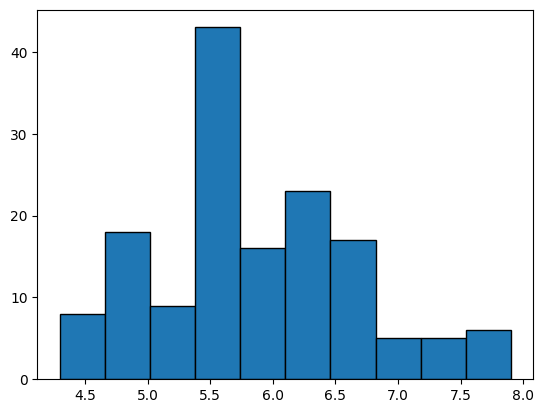

mode of  sepal depth = 0    5.7
Name: sepal depth, dtype: float64


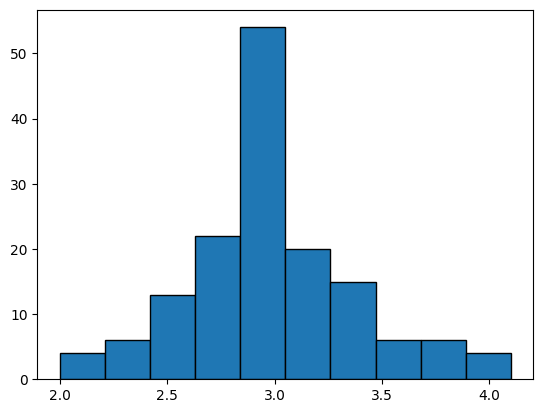

mode of  sepal diameter = 0    3.0
Name: sepal diameter, dtype: float64


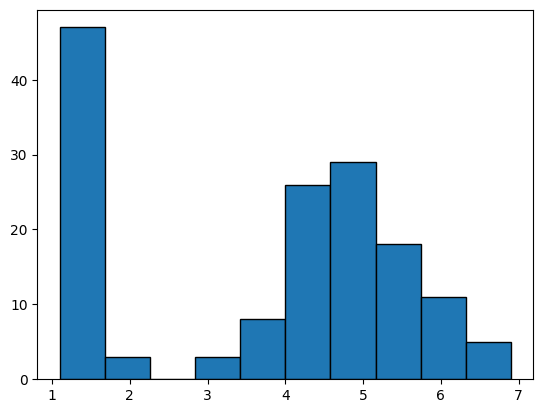

mode of  petal depth = 0    1.5
Name: petal depth, dtype: float64


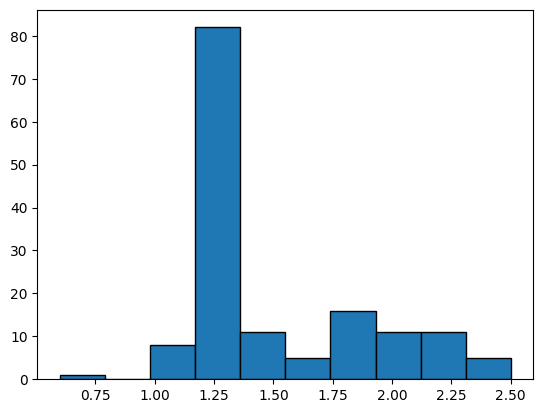

mode of  petal diameter = 0    1.3
Name: petal diameter, dtype: float64


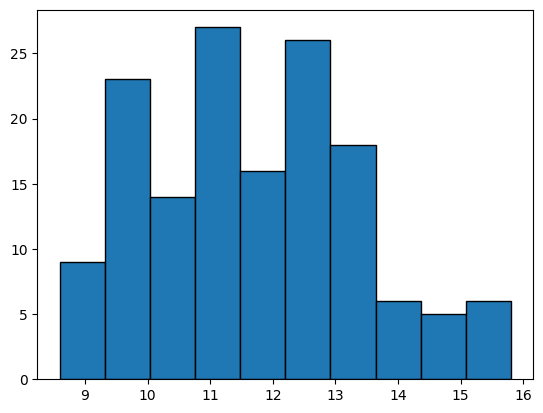

mode of  sepal length = 0    10.0
Name: sepal length, dtype: float64


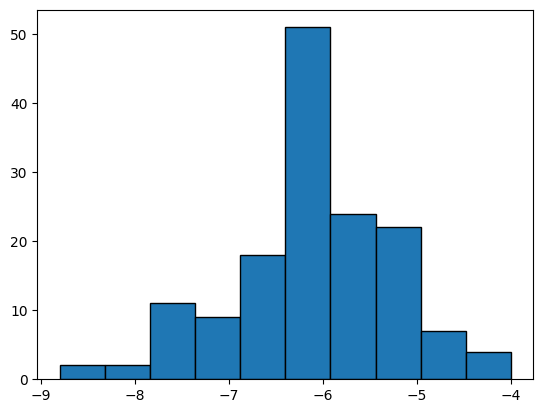

mode of  sepal width = 0   -6.0
Name: sepal width, dtype: float64


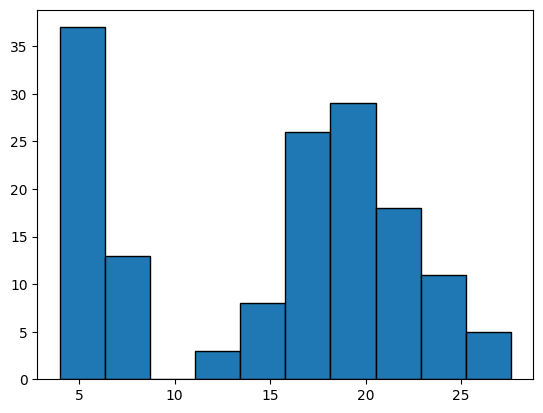

mode of  petal length = 0    6.0
Name: petal length, dtype: float64


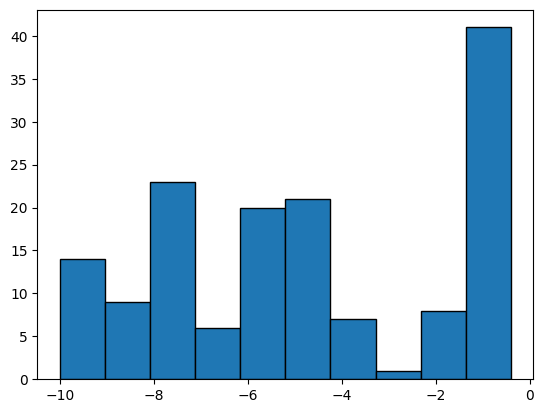

mode of  petal width = 0   -0.8
Name: petal width, dtype: float64


In [34]:
for column in data.columns[:-1]:
  plt.hist(data[column],edgecolor='black')
  plt.show()
  print("mode of ",column,"=",data[column].mode())


In [35]:
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)

2


In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#Normalize
scaler = MinMaxScaler()
data[data.columns[:-1]] = scaler.fit_transform(data[data.columns[:-1]])
#Standardize
scaler = StandardScaler()
data[data.columns[:-1]] = scaler.fit_transform(data[data.columns[:-1]])

In [37]:
data.head()

,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width,target
0,-0.233466,-0.015924,-1.302523,-0.568234,-0.906675,-1.022711,-1.345858,1.3207,Iris-setosa
1,-1.261063,-0.015924,-1.359827,-0.568234,-1.148455,0.129201,-1.345858,1.3207,Iris-setosa
2,-1.517962,0.507785,-1.302523,-0.568234,-1.390235,-0.331564,-1.402769,1.3207,Iris-setosa
3,-1.646412,-0.015924,-1.302523,-0.568234,-1.511125,-0.101181,-1.288948,1.3207,Iris-setosa
4,-0.233466,1.555202,-1.302523,-0.568234,-1.027565,-1.253093,-1.345858,1.3207,Iris-setosa


In [38]:
#Giving each class a number and changing the datatype to int
data.loc[data["target"]=="Iris-setosa","target"]=1
data.loc[data["target"]=="Iris-versicolor","target"]=2
data.loc[data["target"]=="Iris-virginica","target"]=3
print(data['target'].unique())
data['target'] = data['target'].astype(int)
data

[1 2 3]


,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width,target
0,-0.233466,-0.015924,-1.302523,-0.568234,-0.906675,-1.022711,-1.345858,1.320700,1
1,-1.261063,-0.015924,-1.359827,-0.568234,-1.148455,0.129201,-1.345858,1.320700,1
2,-1.517962,0.507785,-1.302523,-0.568234,-1.390235,-0.331564,-1.402769,1.320700,1
3,-1.646412,-0.015924,-1.302523,-0.568234,-1.511125,-0.101181,-1.288948,1.320700,1
4,-0.233466,1.555202,-1.302523,-0.568234,-1.027565,-1.253093,-1.345858,1.320700,1
...,...,...,...,...,...,...,...,...,...
145,1.051030,-0.015924,0.817755,2.011479,1.027565,0.129201,0.816744,-1.449028,3
146,0.537232,-1.325195,0.703145,0.979594,0.544005,1.281113,0.702923,-0.921460,3
147,0.794131,-0.015924,0.817755,1.237565,0.785785,0.129201,0.816744,-1.053352,3
148,0.408782,1.031493,0.932365,2.011479,0.423115,-0.792329,0.930565,-1.449028,3


**Part 3 (Feature Selction)**

**Filter Method**

**Low Variance Filter**

In [39]:
from sklearn.feature_selection import VarianceThreshold
#Set variance threshold and ignore those which are below that particular value
threshold=VarianceThreshold(0.01)
lowVariance_data=pd.DataFrame(threshold.fit_transform(data),columns=data.columns[threshold.get_support()])
lowVariance_data.head()

,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width,target
0,-0.233466,-0.015924,-1.302523,-0.568234,-0.906675,-1.022711,-1.345858,1.3207,1.0
1,-1.261063,-0.015924,-1.359827,-0.568234,-1.148455,0.129201,-1.345858,1.3207,1.0
2,-1.517962,0.507785,-1.302523,-0.568234,-1.390235,-0.331564,-1.402769,1.3207,1.0
3,-1.646412,-0.015924,-1.302523,-0.568234,-1.511125,-0.101181,-1.288948,1.3207,1.0
4,-0.233466,1.555202,-1.302523,-0.568234,-1.027565,-1.253093,-1.345858,1.3207,1.0


**Pearson’s Correlation**

In [40]:
#Define your feature matrix and target vector
X = data.drop('target', axis=1)
y = data['target']
#Calculate the correlation of each feature with the target variable
correlations = X.corrwith(y)
correlations = correlations.abs()
#descending order
sorted_correlations = correlations.sort_values(ascending=False)
#Select the top n features
n = 8
#Making it a list
selected_features = sorted_correlations.index[:n].tolist()
print(selected_features)
# Get the DataFrame with the selected features and the target
Pearson_Corr_data = X[selected_features]
Pearson_Corr_data['target'] = y
Pearson_Corr_data.head()

['petal width', 'petal depth', 'petal length', 'sepal length', 'sepal depth', 'petal diameter', 'sepal width', 'sepal diameter']


<ipython-input-40-23c1990c4947>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pearson_Corr_data['target'] = y


,petal width,petal depth,petal length,sepal length,sepal depth,petal diameter,sepal width,sepal diameter,target
0,1.3207,-1.302523,-1.345858,-0.906675,-0.233466,-0.568234,-1.022711,-0.015924,1
1,1.3207,-1.359827,-1.345858,-1.148455,-1.261063,-0.568234,0.129201,-0.015924,1
2,1.3207,-1.302523,-1.402769,-1.390235,-1.517962,-0.568234,-0.331564,0.507785,1
3,1.3207,-1.302523,-1.288948,-1.511125,-1.646412,-0.568234,-0.101181,-0.015924,1
4,1.3207,-1.302523,-1.345858,-1.027565,-0.233466,-0.568234,-1.253093,1.555202,1


**Mutal Infromation Filter**

In [41]:
X=data.drop('target',axis=1)
y=data['target']
from sklearn.feature_selection import mutual_info_classif, SelectKBest
selector=SelectKBest(mutual_info_classif,k=8)
selector.fit(X,y)
#Those columns which are still present
selected_features = X.columns[selector.get_support()]
mutual_info_data = X[selected_features]
mutual_info_data['target'] = y
mutual_info_data.head()

,sepal depth,sepal diameter,petal depth,petal diameter,sepal length,sepal width,petal length,petal width,target
0,-0.233466,-0.015924,-1.302523,-0.568234,-0.906675,-1.022711,-1.345858,1.3207,1
1,-1.261063,-0.015924,-1.359827,-0.568234,-1.148455,0.129201,-1.345858,1.3207,1
2,-1.517962,0.507785,-1.302523,-0.568234,-1.390235,-0.331564,-1.402769,1.3207,1
3,-1.646412,-0.015924,-1.302523,-0.568234,-1.511125,-0.101181,-1.288948,1.3207,1
4,-0.233466,1.555202,-1.302523,-0.568234,-1.027565,-1.253093,-1.345858,1.3207,1


**Wrapper Method**

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
X = data.drop('target', axis=1)
y = data['target']
#Define the estimator and apply logistic regression
estimator = LogisticRegression()
#Forward Selection
features_forward = []
for i in range(X.shape[1]):
    scores = []
    for column in X.columns:
        if column not in features_forward:
            X_temp = X[features_forward + [column]]
            score = cross_val_score(estimator, X_temp, y, cv=5, scoring='accuracy').mean()
            scores.append((score, column))
    scores.sort(reverse=True)
    features_forward.append(scores[0][1])
print('Selected features (forward):', features_forward)
#Data Frame with selected features
data_forward = data[features_forward + ['target']]

#Backward Elimination
features_backward = list(X.columns)
for i in range(X.shape[1]):
    scores = []
    for feature in features_backward:
        X_temp = X[features_backward]
        X_temp = X_temp.drop(feature, axis=1)
        score = cross_val_score(estimator, X_temp, y, cv=5, scoring='accuracy').mean()
        scores.append((score, feature))
    scores.sort(reverse=True)
    if features_backward and scores[0][1] == features_backward[-1]:
        features_backward.remove(scores[0][1])
print('Selected features (backward):', features_backward)
#Data Frame with selected features
data_backward = data[features_backward + ['target']]
data_forward.head()

Selected features (forward): ['petal width', 'petal length', 'sepal length', 'sepal depth', 'petal depth', 'sepal width', 'sepal diameter', 'petal diameter']
Selected features (backward): ['sepal depth', 'sepal diameter', 'petal depth', 'petal diameter', 'sepal length', 'sepal width', 'petal length']


,petal width,petal length,sepal length,sepal depth,petal depth,sepal width,sepal diameter,petal diameter,target
0,1.3207,-1.345858,-0.906675,-0.233466,-1.302523,-1.022711,-0.015924,-0.568234,1
1,1.3207,-1.345858,-1.148455,-1.261063,-1.359827,0.129201,-0.015924,-0.568234,1
2,1.3207,-1.402769,-1.390235,-1.517962,-1.302523,-0.331564,0.507785,-0.568234,1
3,1.3207,-1.288948,-1.511125,-1.646412,-1.302523,-0.101181,-0.015924,-0.568234,1
4,1.3207,-1.345858,-1.027565,-0.233466,-1.302523,-1.253093,1.555202,-0.568234,1


**PART 4 (Modelling)**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# models are : data, lowVariance_data, Pearson_corr_data, mutual_info_data, data_forward, data_backward
dataModels=[data, lowVariance_data, Pearson_Corr_data, mutual_info_data, data_forward, data_backward]
for model in dataModels:
  X=model.drop('target',axis=1)
  y=model['target']
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
  model=LogisticRegression()
  model.fit(X_train,y_train)
  predicted_Y=model.predict(X_test)
  accuracy_Of_model=accuracy_score(y_test,predicted_Y)
  print("Accuracy of the model is ",accuracy_Of_model)

Accuracy of the model is  0.9333333333333333
Accuracy of the model is  0.9333333333333333
Accuracy of the model is  0.9333333333333333
Accuracy of the model is  0.9333333333333333
Accuracy of the model is  0.9333333333333333
Accuracy of the model is  0.9333333333333333
